In [8]:
import pandas as pd
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt
from sklearn.decomposition import  PCA

In [2]:
# Load astronomy data
data = pd.read_csv('../../Data/DR3/espectros_normalizadosSY.csv')


In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,id
0,0.298540,0.288910,0.270728,0.265745,0.281003,0.287176,0.266657,0.239145,0.244118,0.270922,...,0.893952,0.907187,0.906909,0.920086,0.939917,0.944382,0.975344,0.975237,1.000000,1
1,0.187321,0.059904,0.040154,0.150801,0.259516,0.217557,0.058846,0.153158,0.151218,0.288894,...,0.513965,0.522141,0.529018,0.552321,0.589843,0.627874,0.693038,0.742824,0.814167,1
2,0.354986,0.452690,0.350241,0.240637,0.276160,0.357691,0.339475,0.259200,0.261950,0.319587,...,0.757199,0.692856,0.618022,0.563389,0.534353,0.529347,0.580790,0.659196,0.799375,1
3,0.258981,0.205888,0.125221,0.119809,0.177436,0.203863,0.167638,0.136339,0.164524,0.195191,...,0.389137,0.420764,0.450557,0.487642,0.524829,0.544773,0.566638,0.553427,0.534909,1
4,0.058639,0.059465,0.030795,0.017400,0.030421,0.038995,0.027836,0.020623,0.035006,0.044762,...,0.878500,0.897841,0.905135,0.926023,0.952516,0.960777,0.991910,0.986293,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.222240,0.100221,0.044504,0.065901,0.097564,0.100197,0.081363,0.068870,0.092488,0.142955,...,0.746336,0.798232,0.839520,0.890440,0.941144,0.964865,1.000000,0.984885,0.975152,1
189,0.209241,0.241842,0.231943,0.195540,0.216914,0.263101,0.232148,0.143073,0.154275,0.280540,...,0.729426,0.734261,0.728344,0.734119,0.746700,0.749235,0.775427,0.779711,0.806542,1
190,0.469036,0.418741,0.588243,0.843116,1.000000,0.922588,0.615408,0.245139,0.064415,0.139017,...,0.593132,0.634211,0.667228,0.709789,0.756071,0.786710,0.835245,0.852406,0.886589,1
191,0.092077,0.080549,0.089059,0.102926,0.110376,0.107294,0.094674,0.076398,0.067334,0.076202,...,0.169598,0.179376,0.188147,0.200449,0.213928,0.222166,0.233527,0.233113,0.233347,1


In [4]:
data_t =  data.T


In [5]:
data_t =  data_t.drop(labels='id', axis=0)


In [6]:
data_t

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,0.298540,0.187321,0.354986,0.258981,0.058639,0.127025,0.263424,0.137186,0.038319,0.004025,...,0.217188,0.058830,0.062701,0.028283,0.254761,0.222240,0.209241,0.469036,0.092077,0.075513
1,0.288910,0.059904,0.452690,0.205888,0.059465,0.112698,0.247204,0.127671,0.036264,0.037465,...,0.203986,0.042714,0.051280,0.033894,0.255235,0.100221,0.241842,0.418741,0.080549,0.068851
2,0.270728,0.040154,0.350241,0.125221,0.030795,0.126630,0.215453,0.113152,0.043753,0.002914,...,0.182851,0.060083,0.035860,0.027066,0.165484,0.044504,0.231943,0.588243,0.089059,0.073665
3,0.265745,0.150801,0.240637,0.119809,0.017400,0.138573,0.202827,0.120532,0.051959,0.002079,...,0.181244,0.064785,0.025374,0.016990,0.107800,0.065901,0.195540,0.843116,0.102926,0.076519
4,0.281003,0.259516,0.276160,0.177436,0.030421,0.161102,0.220524,0.144595,0.056293,0.034851,...,0.203233,0.053816,0.021897,0.017465,0.151362,0.097564,0.216914,1.000000,0.110376,0.075982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,0.939917,0.589843,0.534353,0.524829,0.952516,0.558574,0.694216,0.968682,0.934617,0.814085,...,0.653324,0.096235,0.944032,0.979325,0.741518,0.941144,0.746700,0.756071,0.213928,0.947060
339,0.944382,0.627874,0.529347,0.544773,0.960777,0.593588,0.711965,0.974340,0.953822,0.857362,...,0.659660,0.103511,0.942323,0.978305,0.742001,0.964865,0.749235,0.786710,0.222166,0.965115
340,0.975344,0.693038,0.580790,0.566638,0.991910,0.626917,0.738086,1.000000,0.992001,0.920333,...,0.684175,0.109343,0.969789,1.000000,0.765231,1.000000,0.775427,0.835245,0.233527,1.000000
341,0.975237,0.742824,0.659196,0.553427,0.986293,0.615725,0.726844,0.986032,0.988849,0.949721,...,0.686110,0.106423,0.970195,0.985799,0.766185,0.984885,0.779711,0.852406,0.233113,0.990916


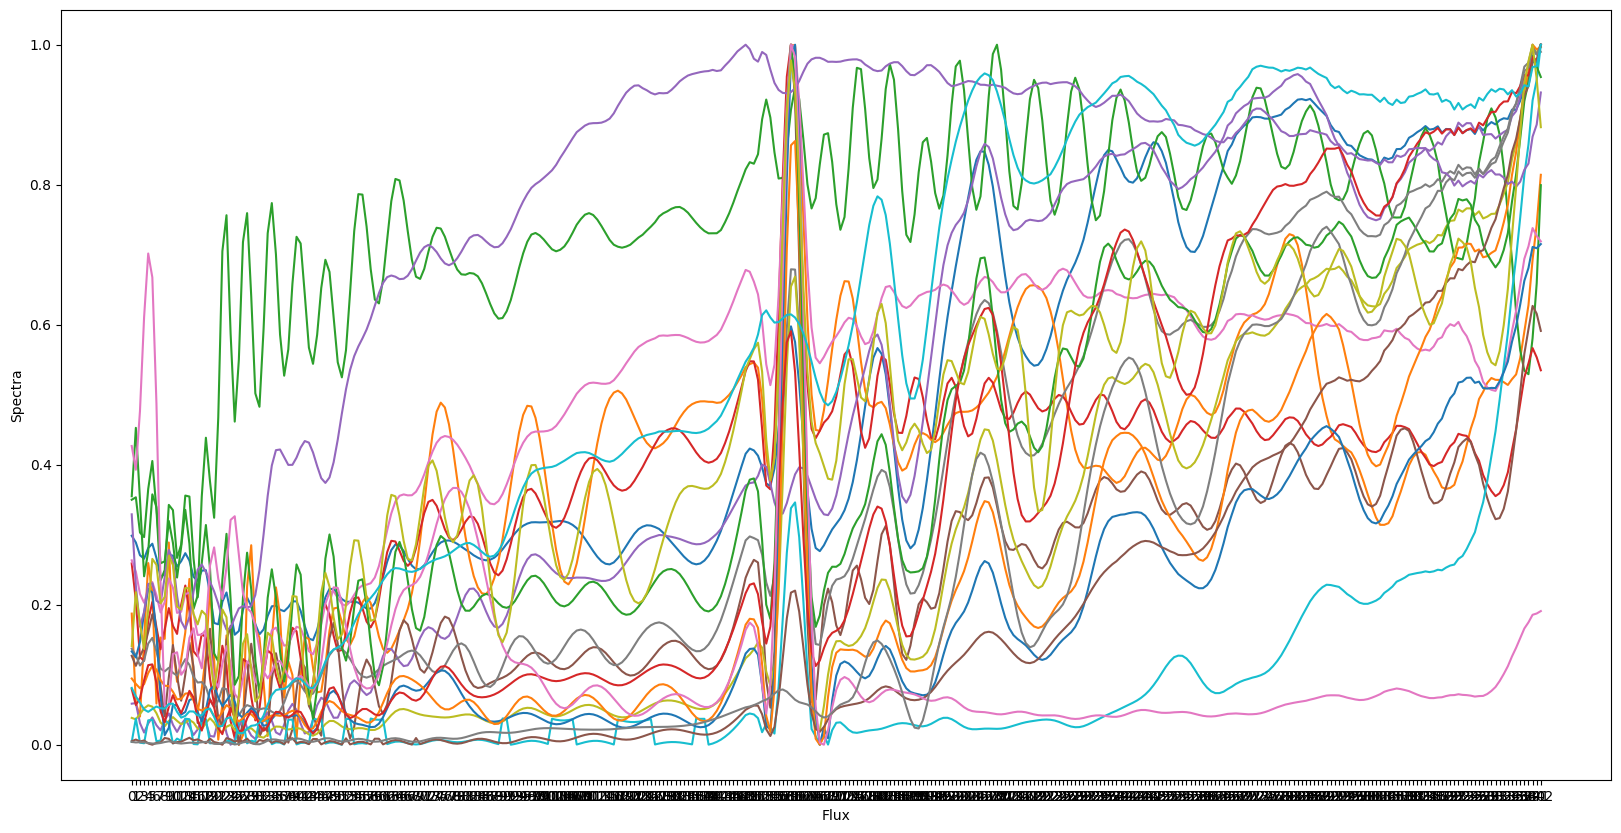

In [27]:
plt.figure(figsize=(20,10))
plt.xlabel("Flux")
plt.ylabel("Spectra")
plt.plot(data_t.iloc[:, 0:20])

In [9]:
#iteration to visualize the optimal number of components in PCA
for i in range(1,40):
  data = []
  pca = PCA(n_components=i)
  features_reduced = pca.fit_transform(data_t)
  print(f"n = {i}")
  print(pca.explained_variance_ratio_.sum())
  data.append(pca.explained_variance_ratio_.sum())

n = 1
0.8289430549744242
n = 2
0.922622687187685
n = 3
0.9595610268253714
n = 4
0.9766008911316484
n = 5
0.9811891508953293
n = 6
0.9838115864326374
n = 7
0.986242947243509
n = 8
0.9883074290221624
n = 9
0.9900489168075054
n = 10
0.9913063793911528
n = 11
0.9923207323529584
n = 12
0.9930593230245983
n = 13
0.9937512174795895
n = 14
0.9943106894620046
n = 15
0.9948102762173606
n = 16
0.9952657282021021
n = 17
0.9956243542297271
n = 18
0.9959681305523436
n = 19
0.9962955030678112
n = 20
0.9965822505041664
n = 21
0.9968582033963953
n = 22
0.9971218323629888
n = 23
0.9973253178080335
n = 24
0.9975104826663626
n = 25
0.9976813809439081
n = 26
0.997848689644141
n = 27
0.9980014745501011
n = 28
0.9981457764731652
n = 29
0.9982807753891529
n = 30
0.9983998265892543
n = 31
0.9985077831812623
n = 32
0.9986116257084184
n = 33
0.998702269648184
n = 34
0.9987850730515981
n = 35
0.9988636616075917
n = 36
0.9989389505537019
n = 37
0.9990131146659119
n = 38
0.999081578541954
n = 39
0.9991451469041216


In [10]:
from sklearn.decomposition import PCA
pca_data = PCA(n_components=10)
pca_transformed = pca_data.fit_transform(data_t)
pca_transformed_data = pd.DataFrame(pca_transformed)

In [11]:
pca_transformed_data

,0,1,2,3,4,5,6,7,8,9
0,-3.088370,1.118697,0.334120,-0.489323,0.467952,0.009310,0.518001,0.002796,-0.108346,0.062312
1,-3.162073,1.194177,0.252047,-0.491975,0.436355,-0.100631,0.484115,-0.042923,0.004484,0.081268
2,-3.213236,1.315308,0.333712,-0.556130,0.481079,-0.035429,0.561353,0.137414,-0.057095,0.145993
3,-3.201723,1.406852,0.501362,-0.607934,0.516564,0.140210,0.652196,0.233431,-0.062858,0.164935
4,-3.140572,1.387874,0.597955,-0.652242,0.493289,0.300237,0.699299,0.173105,-0.003001,0.147083
...,...,...,...,...,...,...,...,...,...,...
338,7.144245,2.147916,0.937027,0.920927,0.428453,0.161085,0.031115,-0.086422,0.415598,-0.209912
339,7.300965,2.200365,1.056606,0.956936,0.457840,0.186509,0.031527,-0.094297,0.451672,-0.264323
340,7.720261,2.269956,1.196087,1.052948,0.496531,0.202539,0.030754,-0.148572,0.547780,-0.274665
341,7.700048,2.315358,1.228948,1.133135,0.503988,0.197268,0.010898,-0.174054,0.579513,-0.199478


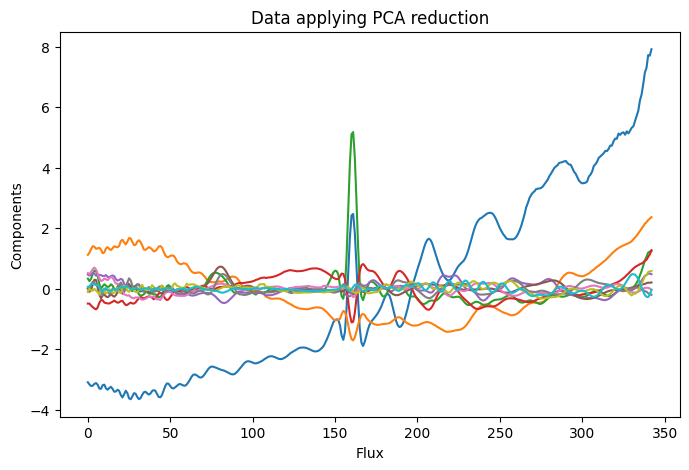

In [26]:
plt.figure(figsize=(8,5))
plt.title("Data applying PCA reduction")
plt.xlabel("Flux")
plt.ylabel("Components")
plt.plot(pca_transformed_data)
plt.show()

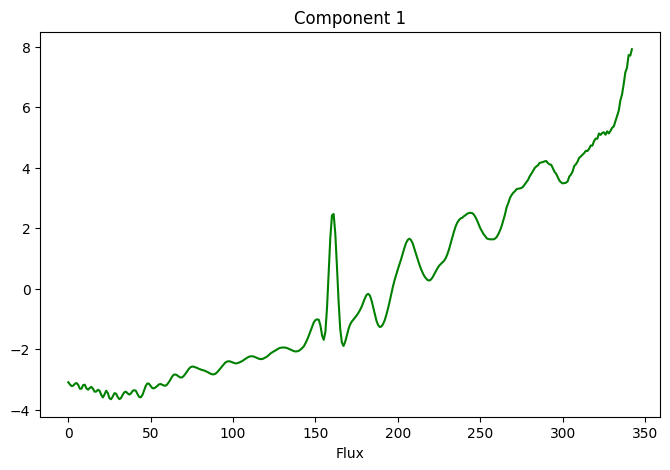

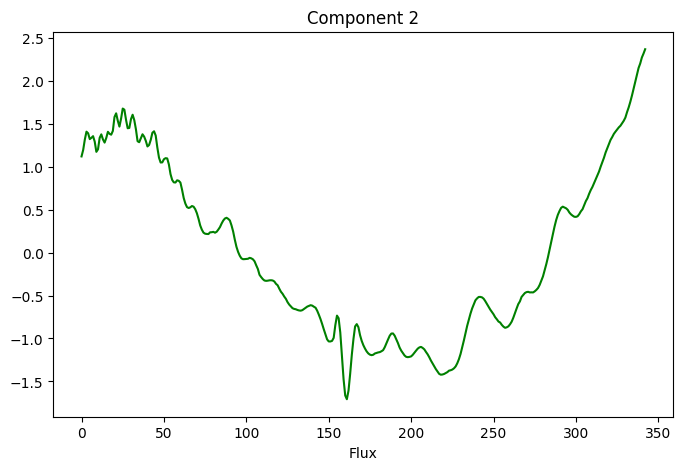

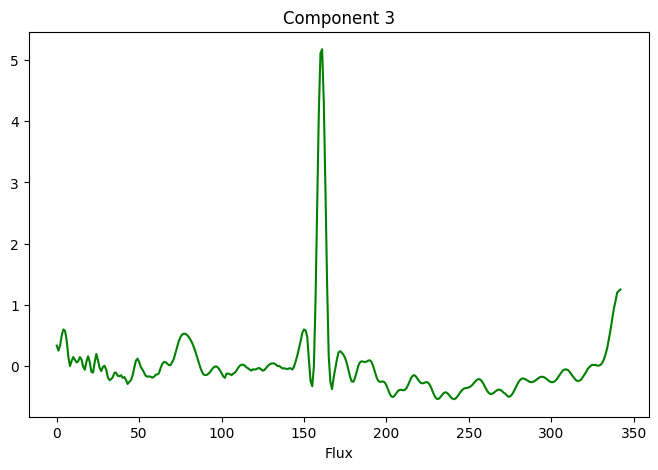

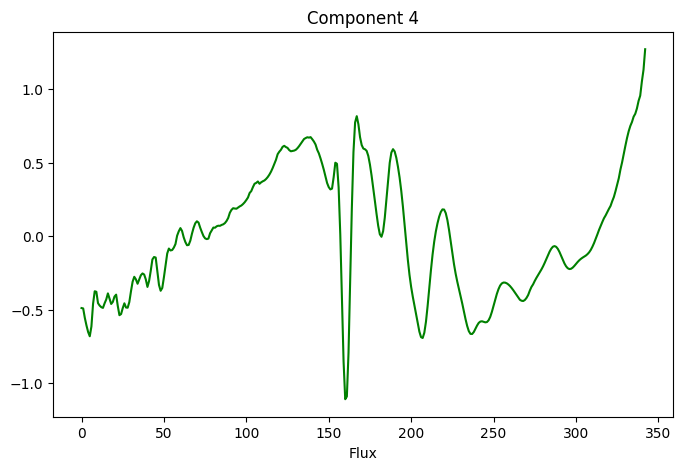

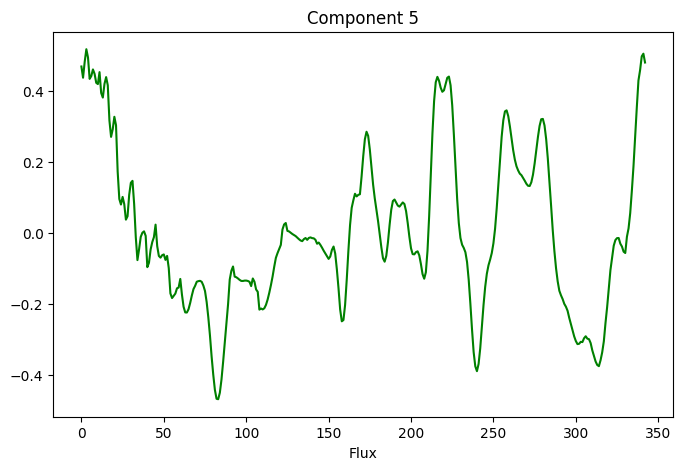

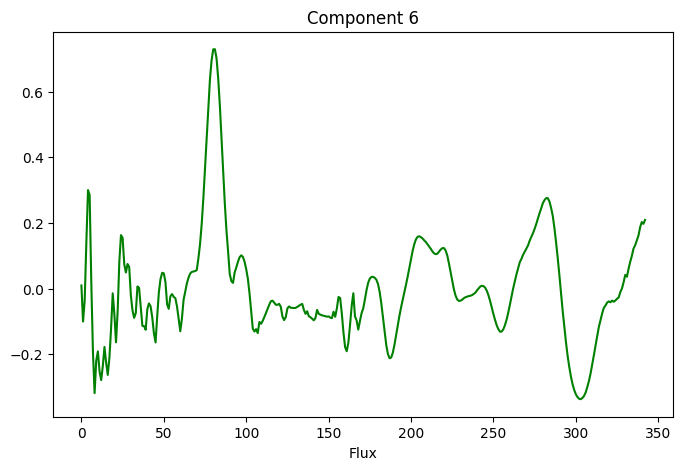

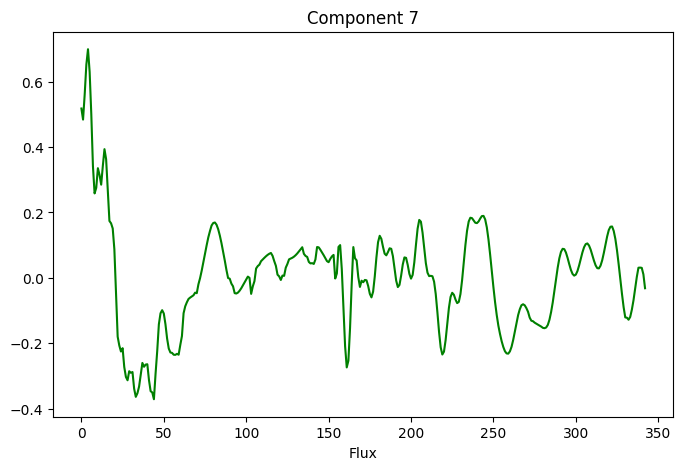

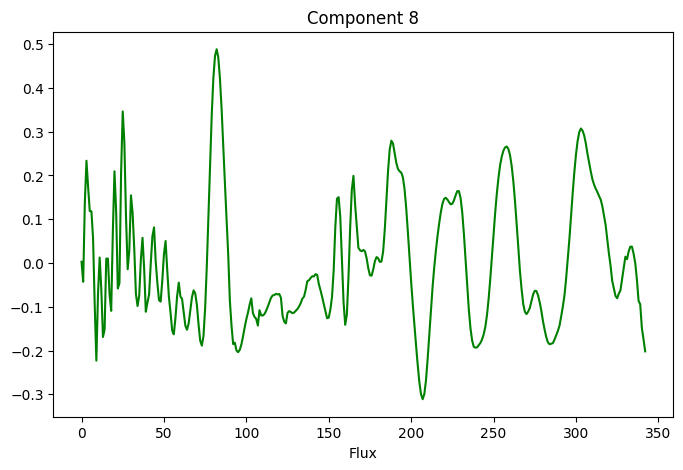

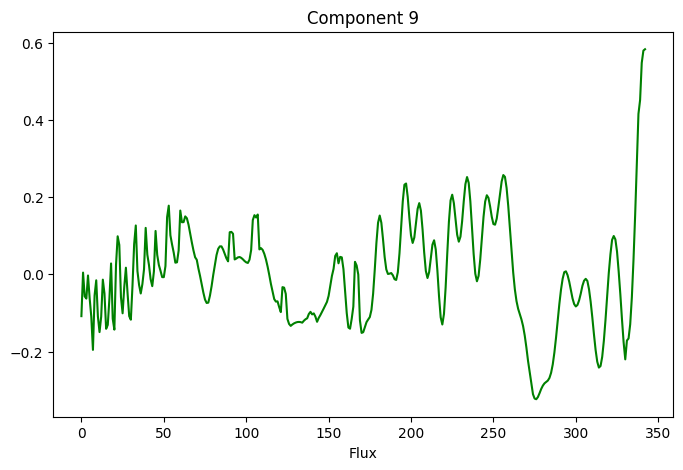

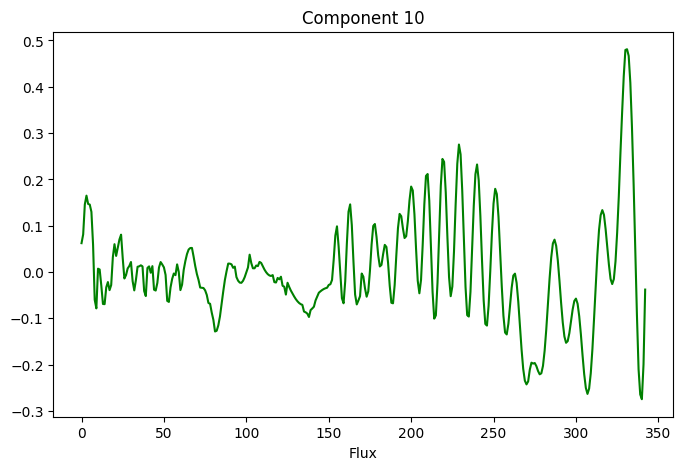

In [25]:
for i in range(1,11):
    plt.figure(figsize=(8,5))
    plt.title(f"Component {i}")
    plt.xlabel("Flux")
    plt.plot(pca_transformed_data.iloc[:,i-1:i], '-',markersize=1, color = "g")
    plt.show()

In [14]:
# Perform LLE on the data
lle = LocallyLinearEmbedding(n_components=10, n_neighbors=70)
lle_transformed = lle.fit_transform(data_t)
lle_transformed_data = pd.DataFrame(lle_transformed)

In [15]:
lle_transformed_data

,0,1,2,3,4,5,6,7,8,9
0,0.061661,-0.078359,-0.019418,0.131987,-0.044076,0.147423,0.004555,0.039945,-0.010768,0.012794
1,0.062580,-0.083666,-0.020325,0.106656,-0.043768,0.146737,-0.000362,0.020915,-0.005336,0.020935
2,0.064122,-0.091998,-0.023572,0.123330,-0.050657,0.157276,-0.004958,-0.034436,0.011613,0.021520
3,0.064807,-0.096125,-0.025965,0.149152,-0.056518,0.166851,-0.005745,-0.051202,0.016738,0.011021
4,0.064044,-0.092207,-0.025830,0.172981,-0.056256,0.158411,-0.001027,-0.013895,0.005059,-0.019541
...,...,...,...,...,...,...,...,...,...,...
338,-0.119340,-0.086493,0.073894,0.019043,0.126468,0.018510,-0.080653,-0.037213,-0.148291,-0.020443
339,-0.121388,-0.089211,0.076845,0.019845,0.131921,0.019485,-0.084439,-0.039744,-0.157935,-0.022002
340,-0.126143,-0.095384,0.085680,0.021675,0.139588,0.020418,-0.097498,-0.047952,-0.190395,-0.023979
341,-0.126555,-0.096055,0.085913,0.022018,0.143733,0.021469,-0.099249,-0.048167,-0.191672,-0.026489


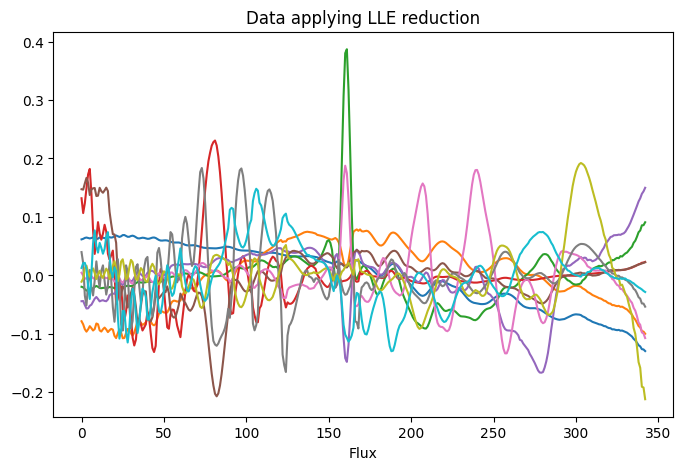

In [24]:
plt.figure(figsize=(8,5))
plt.title("Data applying LLE reduction")
plt.xlabel("Flux")
plt.plot(lle_transformed_data.iloc[:,:])
plt.show()

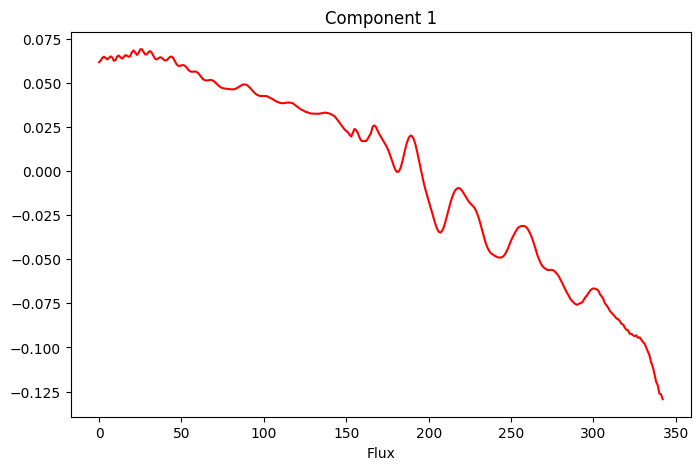

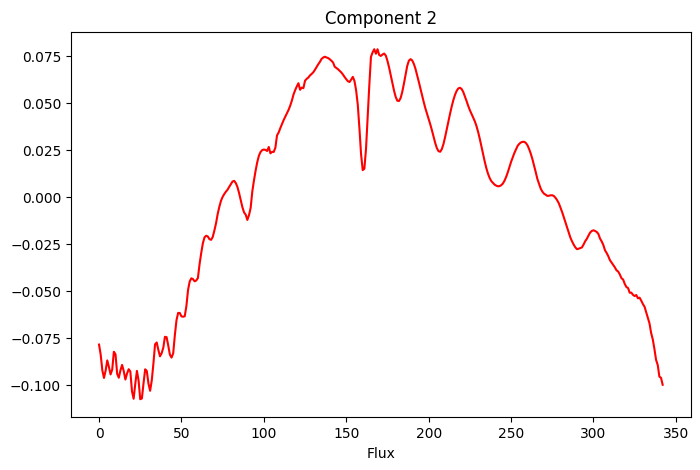

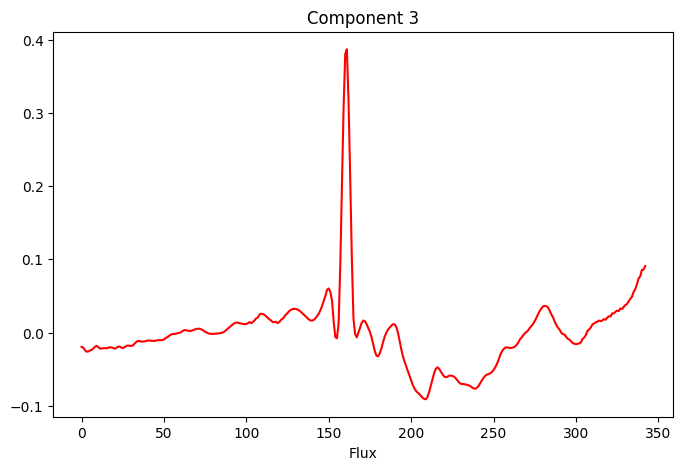

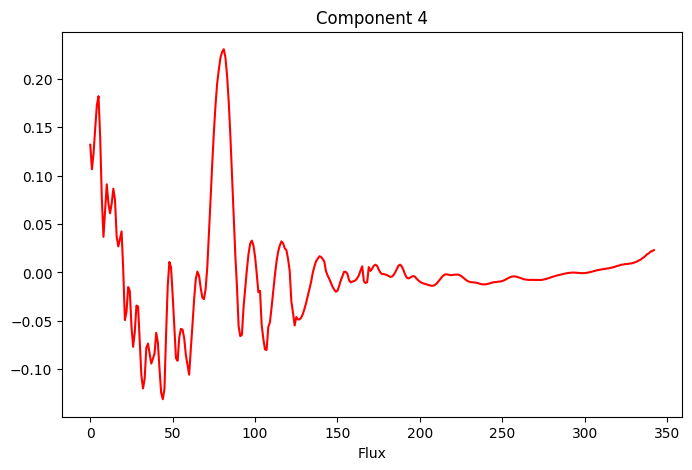

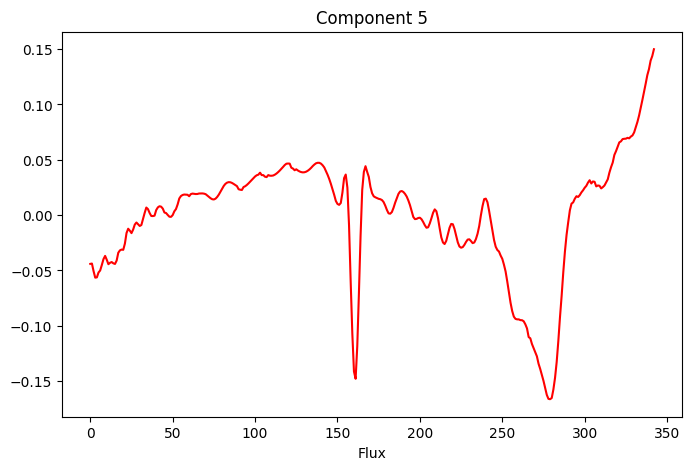

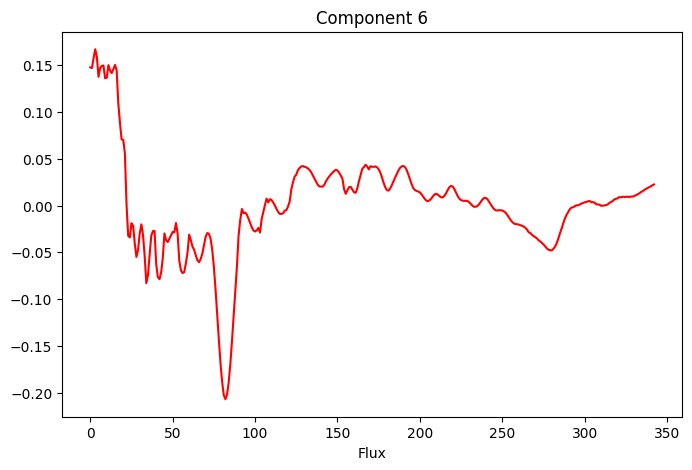

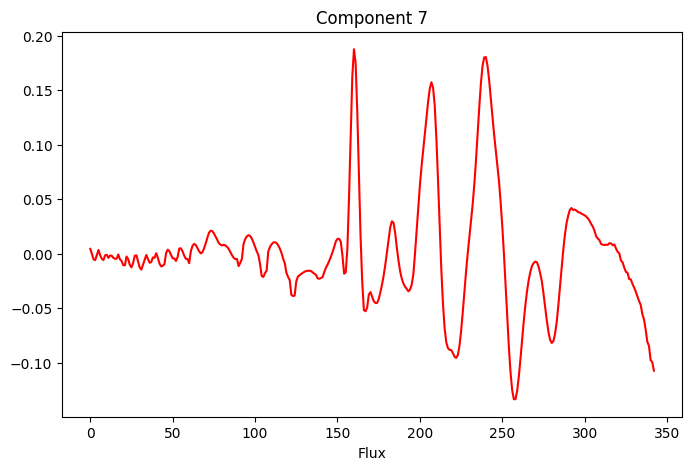

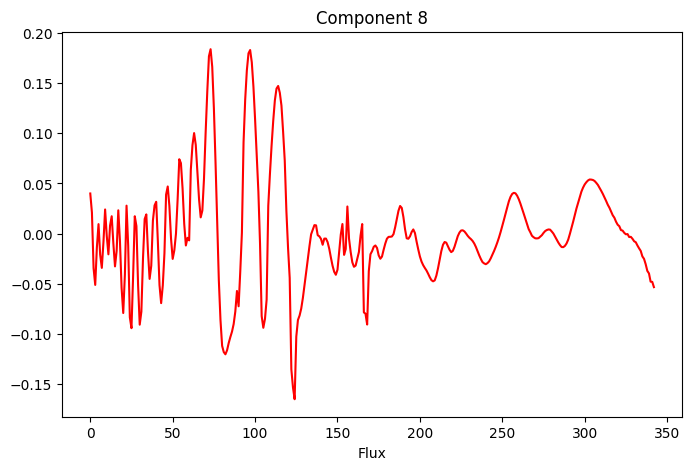

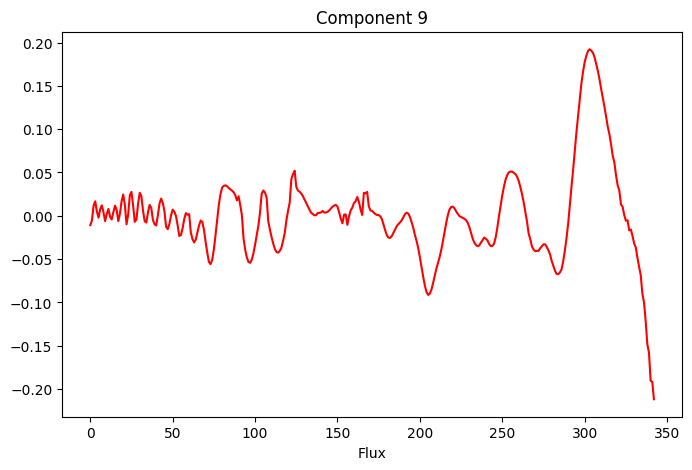

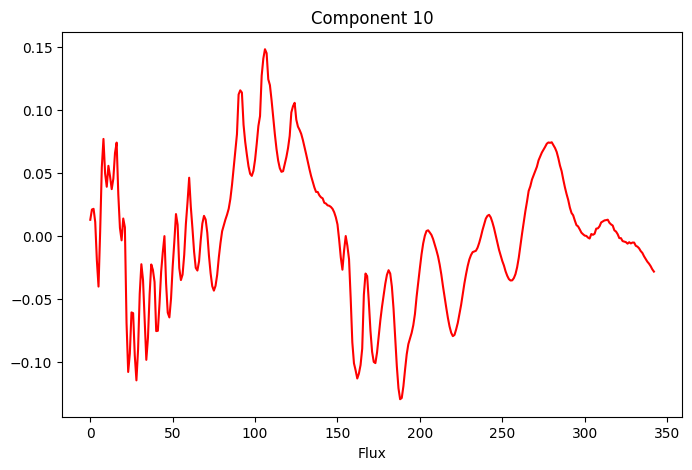

In [23]:
for i in range(1,11):
    plt.figure(figsize=(8,5))
    plt.title(f"Component {i}")
    plt.xlabel("Flux")
    plt.plot(lle_transformed_data.iloc[:, i-1:i], '-',markersize=1, color = "r")
    plt.show()

In [18]:
# Perform HLLE on the data
#for method hessian, n_neighbours must be a greater than [n_components * (n_components +3) /2 ]
hlle = LocallyLinearEmbedding(n_components=10, n_neighbors=80, method='hessian', eigen_solver='dense')
hlle_transformed = hlle.fit_transform(data_t)
hlle_transformed_data = pd.DataFrame(hlle_transformed)

In [19]:
hlle_transformed_data

,0,1,2,3,4,5,6,7,8,9
0,0.060746,0.064975,-0.032905,-0.075572,-0.135142,-0.056030,-0.120163,0.019897,-0.046283,0.049861
1,0.062072,0.066640,-0.019304,-0.081010,-0.129925,-0.061383,-0.092219,0.003288,-0.042023,0.027683
2,0.064556,0.074339,-0.030968,-0.079700,-0.127476,-0.022641,-0.141014,0.005098,-0.029147,0.020954
3,0.065567,0.080957,-0.049649,-0.084466,-0.106002,0.032314,-0.182562,0.007055,-0.014191,0.011920
4,0.063991,0.082021,-0.061148,-0.095815,-0.076226,0.059855,-0.174593,0.013203,-0.010187,0.014433
...,...,...,...,...,...,...,...,...,...,...
338,-0.128585,0.126906,-0.062307,0.091682,-0.078667,0.104295,0.059424,-0.051671,0.005786,0.159136
339,-0.131338,0.131029,-0.069318,0.094308,-0.084028,0.113747,0.062665,-0.047439,0.029807,0.201717
340,-0.138483,0.137972,-0.081725,0.097076,-0.099005,0.143402,0.078861,-0.065693,0.033495,0.266967
341,-0.138960,0.140244,-0.086930,0.101965,-0.102482,0.151735,0.086216,-0.108735,0.011120,0.278096


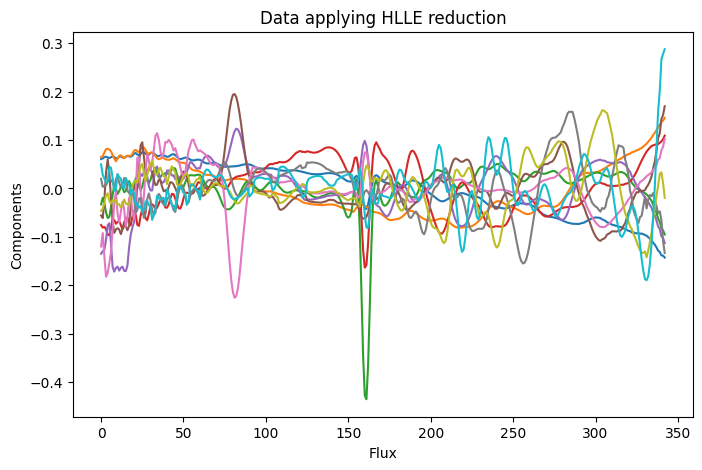

In [20]:
plt.figure(figsize=(8,5))
plt.title("Data applying HLLE reduction")
plt.xlabel("Flux")
plt.ylabel("Components")
plt.plot(hlle_transformed_data.iloc[:,:])
plt.show()

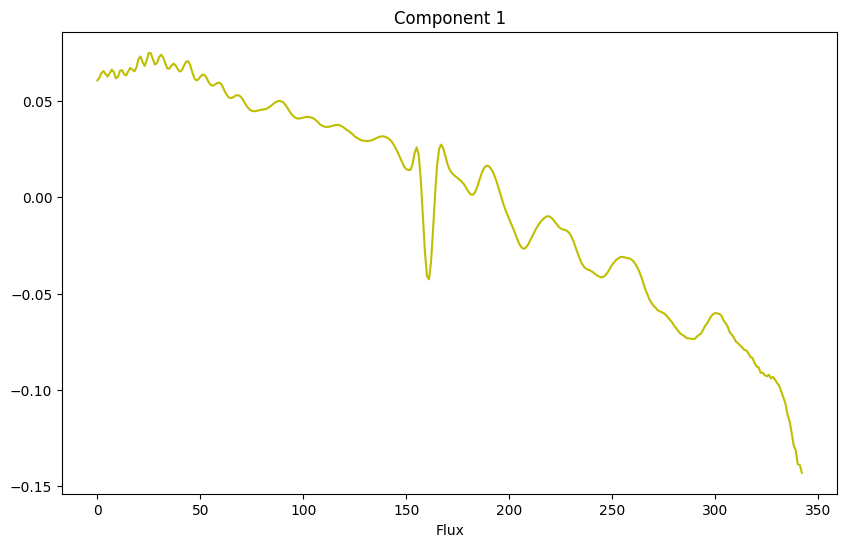

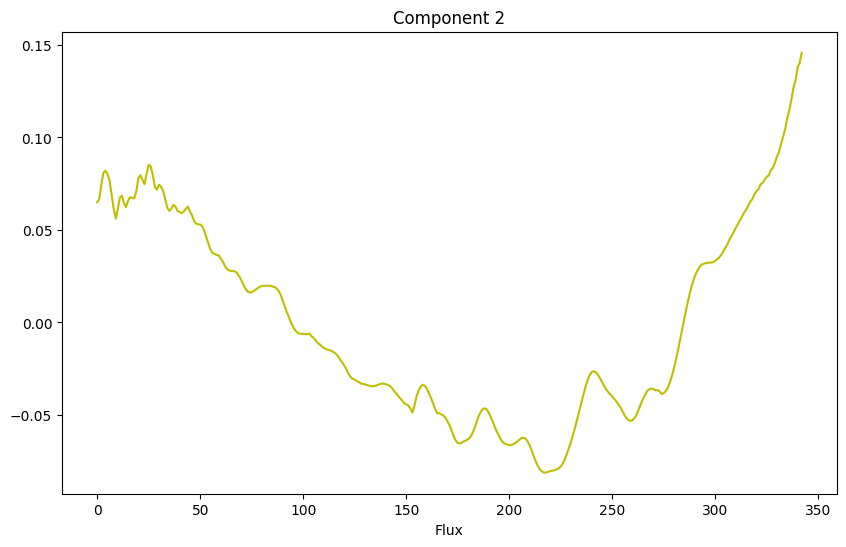

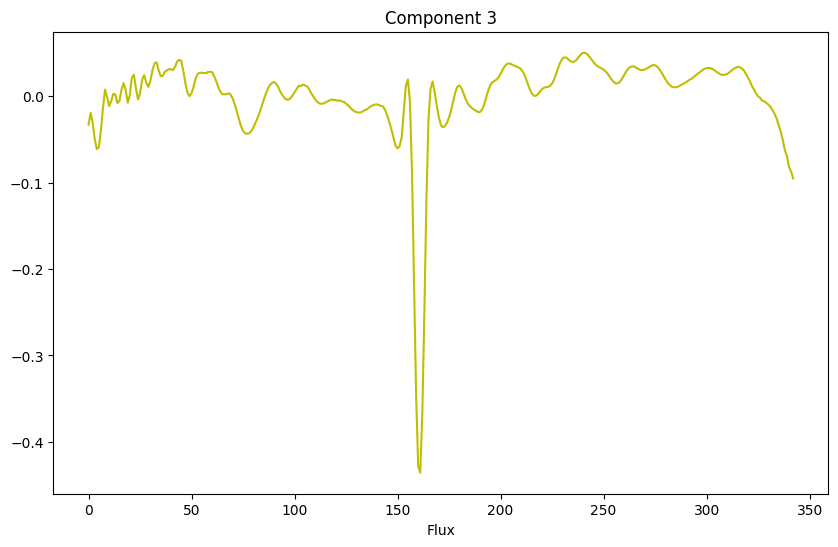

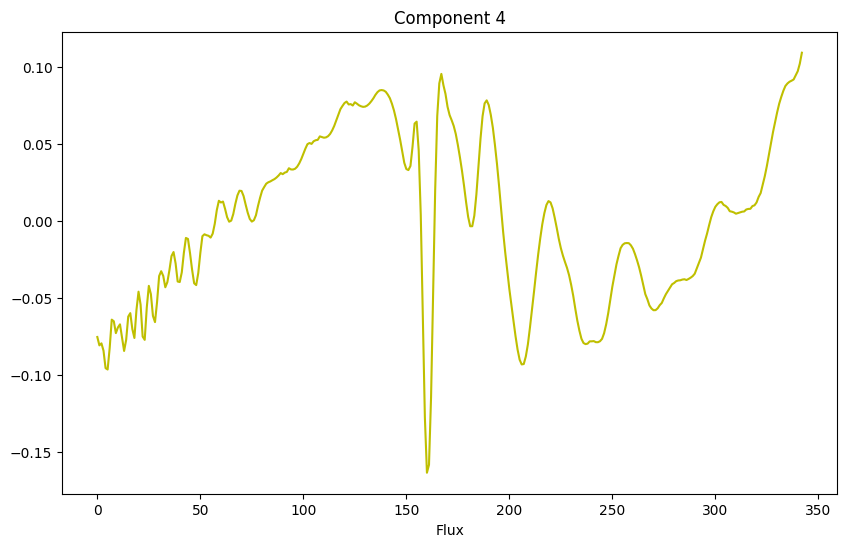

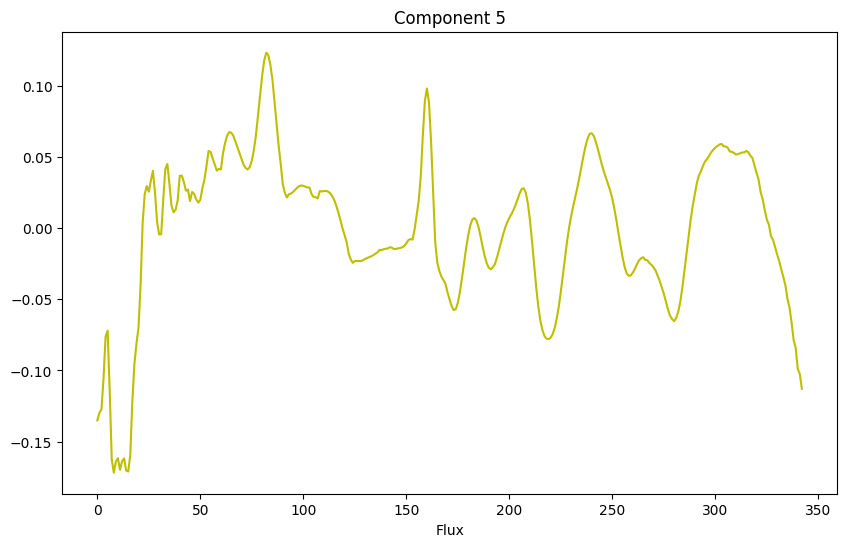

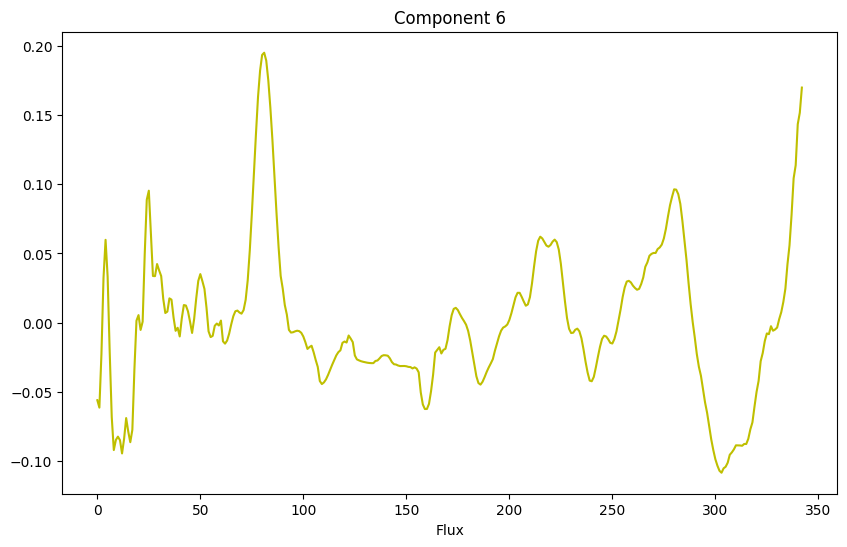

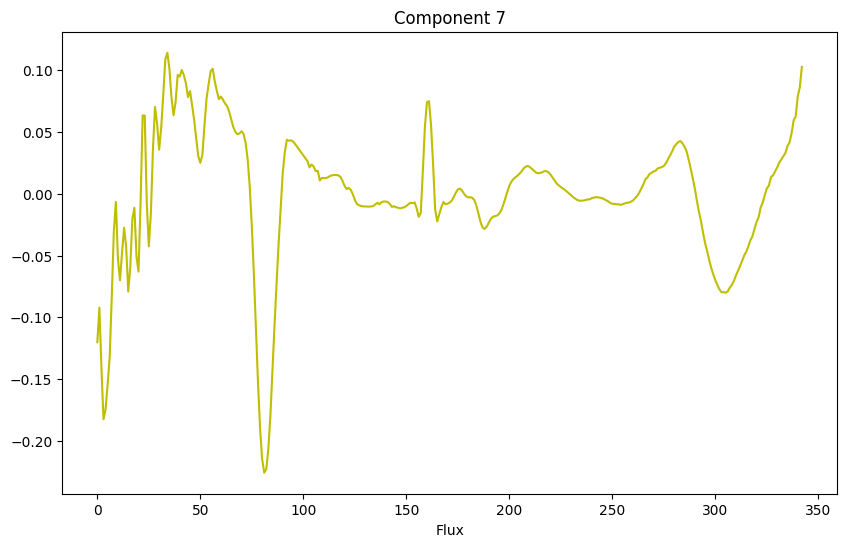

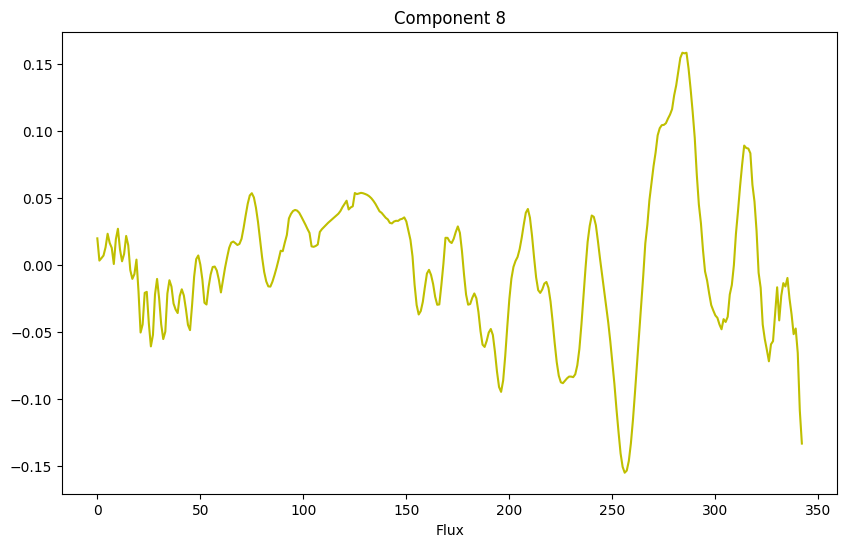

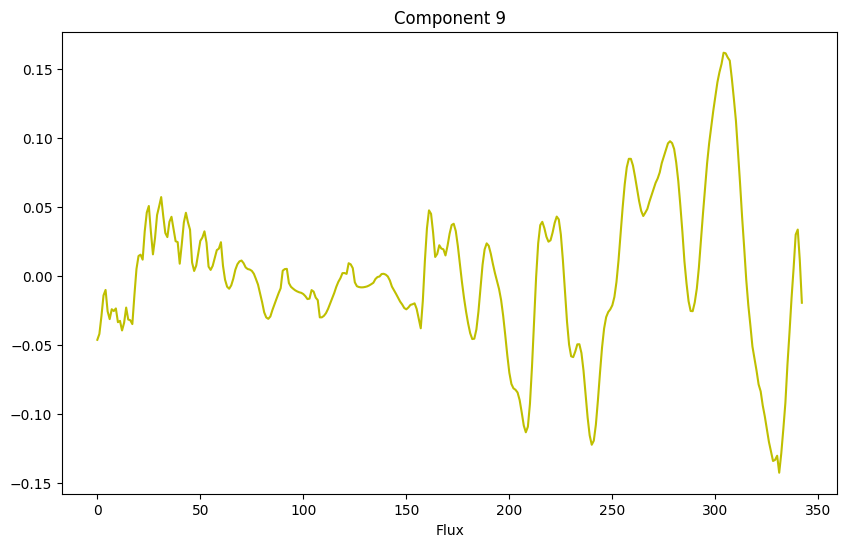

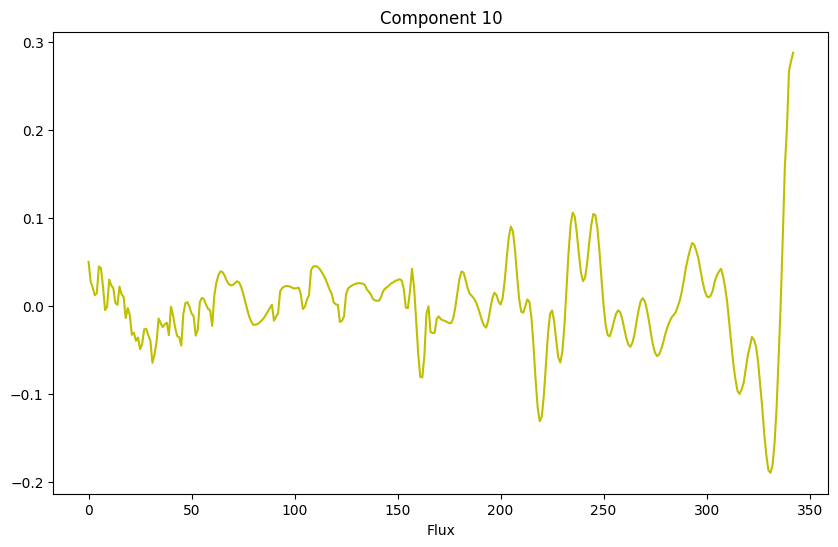

In [21]:
for i in range(1,11):
    plt.figure(figsize=(10,6))
    plt.title(f"Component {i}")
    plt.xlabel("Flux")
    plt.plot(hlle_transformed_data.iloc[:, i-1:i], '-',markersize=1, color = "y")
    plt.show()

C:\Users\joshp\AppData\Local\Temp\ipykernel_26540\393995572.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


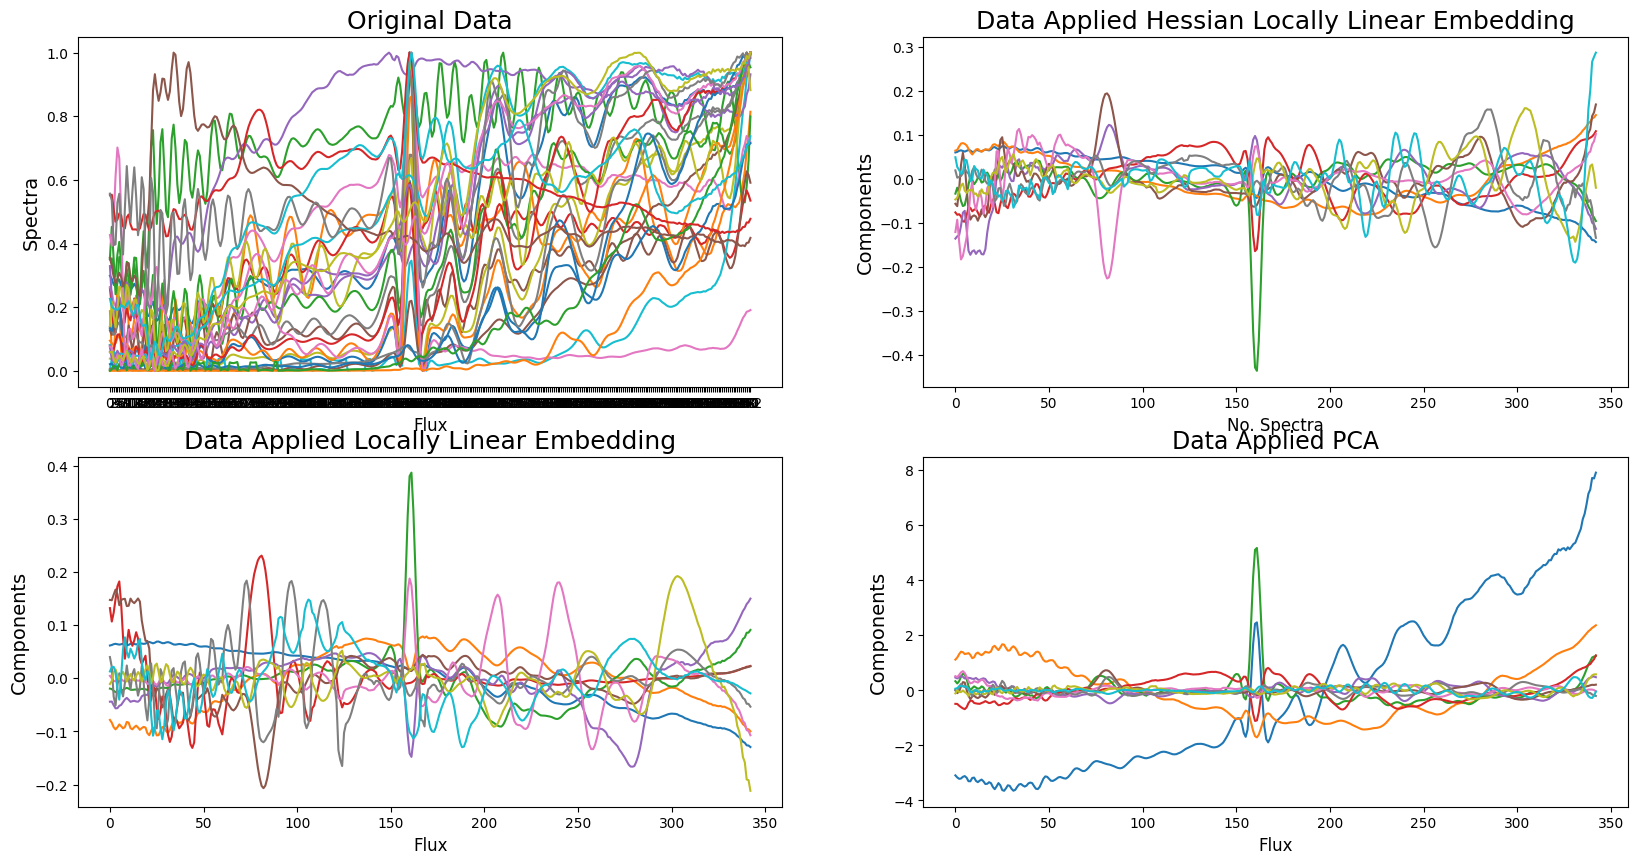

In [32]:
fig =  plt.figure(figsize=(20,10))
ax = fig.subplots(2,2)
ax[0,0].set_title("Original Data", fontsize=18)
ax[0,0].set_ylabel("Spectra", fontsize=14)
ax[0,0].set_xlabel("Flux", fontsize=12)
ax[0,0].plot(data_t.iloc[:,:30])

ax[0,1].set_title("Data Applied Hessian Locally Linear Embedding", fontsize=18)
ax[0,1].set_ylabel("Components", fontsize=14)
ax[0,1].set_xlabel("No. Spectra", fontsize=12)
ax[0,1].plot(hlle_transformed_data)


ax[1,0].set_title("Data Applied Locally Linear Embedding", fontsize=18)
ax[1,0].set_ylabel("Components", fontsize=14)
ax[1,0].set_xlabel("Flux", fontsize=12)
ax[1,0].plot(lle_transformed_data)

#PCA
ax[1,1].set_title("Data Applied PCA", fontsize=17)
ax[1,1].set_ylabel("Components", fontsize=14)
ax[1,1].set_xlabel("Flux", fontsize=12)
ax[1,1].plot(pca_transformed_data)

fig.show()
#plt.plot(lle_transformed[0:20])
#plt.plot(data[0:100:5])
